# Exploratory Analysis with Pandas

We will be taking a look on a dataset on vehicles. Since we don't have a primary objective, we will explore the data and see if something interests us.

When we have a clear object before hand, cleaning the data can be a more direct process, since we have some previous information.

But that is not the case always.

## Table of Contents
- [Checking for nulls](#nan)
- [Nulls Paradox](#paradox)
- [Using multiple conditions](#mult)
- [Bitwise Operators](#bitwise)
- [Iterate over Rows](#iter)
- [Apply over different axes](#axis)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Reading a CSV
# Comma Separated Values
# Lots of different files can be read by pandas directly, 
# such as excel, json, even SQL connections
df = pd.read_csv("../datasets/vehicles_messy.csv")

/Users/felipe/miniforge3/envs/ironhack/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [4]:
# That's a big(ish) dataset, let's see how big
df.shape

(37843, 83)

In [5]:
# What columns does it contain?
df.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

#### But what does each of these columns mean?
- Knowledge of the data domain results in better knowlegde of the data

In [6]:
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


### Checking for Nulls <a name=nan></a>

In [7]:
# We sum the quantities of nulls on each column
df.isnull().sum().sort_values(ascending=False)

c240bDscr      37807
c240Dscr       37806
evMotor        37281
sCharger       37177
rangeA         36440
               ...  
highwayUF          0
highwayE           0
highwayCD          0
highwayA08U        0
barrels08          0
Length: 83, dtype: int64

In [8]:
# Dividing it by the number of entries (rows), we get a percentage of nulls
# We can see that some columns have a very high number of nulls.
df.isnull().sum().apply(lambda x: x/df.shape[0]).sort_values(ascending=False)

c240bDscr      0.999049
c240Dscr       0.999022
evMotor        0.985149
sCharger       0.982401
rangeA         0.962926
                 ...   
highwayUF      0.000000
highwayE       0.000000
highwayCD      0.000000
highwayA08U    0.000000
barrels08      0.000000
Length: 83, dtype: float64

## Data Analyst paradox : <a name=paradox></a>
When cleaning data:
- Remove nulls (and throw away other data with it)

or
- Fill nulls (with invented data)

In [9]:
df.dropna(axis=0, how="all")

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37838,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
37839,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
37840,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
37841,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [10]:
# Let's see if any row has ALL null values
df.isnull().sum(axis=1).apply(lambda x: x/df.shape[1]).sort_values(ascending=False)

18541    0.168675
18353    0.168675
8147     0.168675
18826    0.168675
8144     0.168675
           ...   
29923    0.060241
24739    0.060241
30873    0.060241
29924    0.048193
30453    0.048193
Length: 37843, dtype: float64

## Checking which collumns have a high percentage of nulls.
A 70% is an arbitrary value we chose, there is no recipe to follow here.
But starting from this  separation, let's see if any of the columns gets our attention.

In [11]:
perc_null = df.isnull().sum().apply(lambda x: x/df.shape[0]).sort_values(ascending=False)

In [12]:
perc_null[perc_null > .7].index

Index(['c240bDscr', 'c240Dscr', 'evMotor', 'sCharger', 'rangeA', 'fuelType2',
       'guzzler', 'atvType', 'tCharger', 'startStop', 'mfrCode'],
      dtype='object')

In [13]:
cols = perc_null[perc_null < .7].index
cols

Index(['trans_dscr', 'eng_dscr', 'drive', 'cylinders', 'displ', 'trany',
       'engId', 'combinedUF', 'combinedCD', 'combE', 'phevComb', 'feScore',
       'fuelCost08', 'combA08', 'fuelCostA08', 'fuelType', 'fuelType1',
       'ghgScore', 'combA08U', 'co2', 'comb08U', 'cityA08U', 'barrelsA08',
       'charge120', 'charge240', 'city08', 'city08U', 'cityA08', 'cityCD',
       'comb08', 'cityE', 'cityUF', 'highway08', 'co2A', 'co2TailpipeAGpm',
       'co2TailpipeGpm', 'ghgScoreA', 'hlv', 'highway08U', 'UHighwayA',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'UCity', 'UCityA', 'UHighway',
       'VClass', 'highwayA08', 'year', 'youSaveSpend', 'charge240b',
       'createdOn', 'modifiedOn', 'phevCity', 'rangeCity', 'range', 'pv4',
       'pv2', 'phevBlended', 'mpgData', 'model', 'make', 'lv4', 'lv2', 'id',
       'hpv', 'phevHwy', 'highwayUF', 'highwayE', 'highwayCD', 'highwayA08U',
       'barrels08'],
      dtype='object')

## Investigating a high percentage of nulls column.
`"fuelType2"` caught our attention. Let's examine it a little bit closer. Since it relates with columns `"fuelType"` and `"fuelType1"`, maybe we can fill some of the nulls with data extrapolated from these or maybe they contain redundant data and can be eliminated.

We would ideally do this to all the columns.

In [14]:
# Checking unique values
df['fuelType2'].unique()

array([nan, 'Natural Gas', 'E85', 'Propane', 'Electricity'], dtype=object)

### Value Counts
We can see how many times each value appears.

This is a very useful way to get a first impression of categorical data

In [15]:
df["fuelType2"].value_counts(dropna=False)

NaN            36435
E85             1325
Electricity       55
Natural Gas       20
Propane            8
Name: fuelType2, dtype: int64

In [16]:
df['fuelType'].value_counts(dropna=False)

Regular                        25076
Premium                        10004
Gasoline or E85                 1204
Diesel                          1101
Premium or E85                   121
Electricity                      120
Midgrade                          74
CNG                               60
Gasoline or natural gas           20
Premium and Electricity           20
Premium Gas or Electricity        17
Regular Gas and Electricity       16
Gasoline or propane                8
Regular Gas or Electricity         2
Name: fuelType, dtype: int64

In [17]:
df['fuelType1'].value_counts(dropna=False)

Regular Gasoline     26326
Premium Gasoline     10162
Diesel                1101
Electricity            120
Midgrade Gasoline       74
Natural Gas             60
Name: fuelType1, dtype: int64

### Looks like...
We maybe found something to explain the high number of nulls on `"fuelType2"`.

See how some of the values on `"fuelType"` are actually two values? Perhaps the NaN values on the `"fuelType2"` are those cars that do not have a second type of fuel.

Let's look at the `"fuelType"` values for where the `"fuelType2"` is null.

In [18]:
df["fuelType"][df["fuelType2"].isna()].value_counts()

Regular        25076
Premium        10004
Diesel          1101
Electricity      120
Midgrade          74
CNG               60
Name: fuelType, dtype: int64

And where it is NOT null:

In [19]:
df["fuelType"][df["fuelType2"].notna()].value_counts()

Gasoline or E85                1204
Premium or E85                  121
Gasoline or natural gas          20
Premium and Electricity          20
Premium Gas or Electricity       17
Regular Gas and Electricity      16
Gasoline or propane               8
Regular Gas or Electricity        2
Name: fuelType, dtype: int64

Looks like indeed we found the reason for so many nulls. Since this is repeated information we don't really need to have `"fuelType"`, the data there is just a combination of the two other columns. So let's drop it.

In [20]:
df.drop(columns="fuelType", inplace=True)

## Multiple conditions selecting <a name=mult></a>

Let's take a look on Electric and Hybrid cars, or any car that use electricity as a fuel source.

We can store each condition (i.e.: Series of Truth values) on a variable.

In [21]:
fuel1_elect = df["fuelType1"]=="Electricity"

In [22]:
fuel2_elect = df["fuelType2"]=="Electricity"

In [23]:
# We should be able to combine them with an or 
fuel1_elect or fuel2_elect

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Bitwise operators <a name=bitwise></a>

If we use `or`, `and` or `not`, we will trying to analyze the truth value of the whole series as one, not each element separately. Since there are multiple ways to imagine what would make a series of True and False be evaluated as True or False, we get an error saying it is ambiguous.

When comparing two series of True and False values, to apply logic operators element by element, we must use the bitwise operators.

They are:

- `&` : and
- `|` : or
- `~` : not

In [24]:
~pd.Series([True, False, True])

0    False
1     True
2    False
dtype: bool

In [25]:
# So, like this:
fuel1_elect | fuel2_elect

0        False
1        False
2        False
3        False
4        False
         ...  
37838    False
37839    False
37840    False
37841    False
37842    False
Length: 37843, dtype: bool

In [26]:
df[fuel1_elect | fuel2_elect]["co2"].mean()

51.62285714285714

In [27]:
df[fuel1_elect | fuel2_elect]["co2"].median()

0.0

In [28]:
df[~(fuel1_elect | fuel2_elect)]["co2"].mean()

61.54961771264734

We would expect a bigger difference between electric/hybrid and non electric cars.

<AxesSubplot:xlabel='co2'>

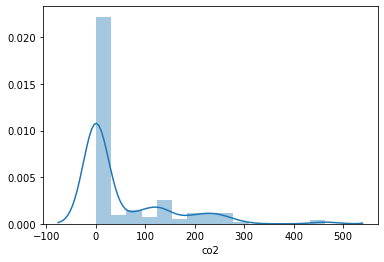

In [29]:
sns.distplot(df[fuel1_elect | fuel2_elect]["co2"])

It seems that there are some cars that are hybrid, but still emit quite a lot of co2. Let's see the top 10 of them.

In [30]:
top_10co2_hyb = df.loc[df[fuel1_elect | fuel2_elect]["co2"].sort_values(ascending=False).iloc[:10].index]

In [31]:
top_10co2_hyb['displ']

28140    3.8
28197    3.8
30256    3.0
27315    4.6
29360    3.0
28466    3.0
30558    3.0
30970    2.0
29752    2.0
29924    2.0
Name: displ, dtype: float64

In [32]:
top_10co2_hyb[['cylinders',"make","model"]]

,cylinders,make,model
28140,8.0,McLaren Automotive,P1
28197,8.0,McLaren Automotive,P1
30256,6.0,Mercedes-Benz,GLE550e 4matic
27315,8.0,Porsche,918 Spyder
29360,6.0,Porsche,Cayenne S e-Hybrid
28466,6.0,Porsche,Cayenne S e-Hybrid
30558,6.0,Porsche,Cayenne S e-Hybrid
30970,4.0,BMW,X5 xDrive40e
29752,4.0,BMW,X5 xDrive40e
29924,4.0,Volvo,XC90 AWD PHEV


Seems like there are some VERY high end hybrid cars that are absolutely not eco friendly.

<img src=https://www.supercars.net/blog/wp-content/uploads/2019/11/f8fb3299-mclaren-p1-gtr-5.jpg width=600>

Let's try to answer a question.
## Hypothesis: Are automatic transmission cars more ecologic than Manual transmission?

In [33]:
[col for col in df.columns if "tr" in col]

['trany', 'trans_dscr']

There are two columns that contain "tr". We are looking for data on the transmission. So we check these.

In [34]:
df['trans_dscr'].unique()

array([nan, 'SIL', '2MODE CLKUP', 'CLKUP', '2MODE', '3MODE CLKUP',
       '2MODE 2LKUP', '3MODE', '4MODE', 'Creeper', 'SIL Creeper',
       'EMS 2MODE', '2LKUP', '2MODE CLKUP FW', 'DC/FW', 'EMS',
       '2MODE VLKUP', 'EMS 2MODE CLKU', '3MODE 2LKUP', 'EMS 3MODE',
       'VMODE CLKUP', 'VLKUP', 'EMS 2MODE CLKUP', 'EMS CLKUP',
       'EMS CMODE CLKUP', 'SIL CLKUP', 'CMODE CLKUP', 'VMODE', 'CMODE',
       '3LKUP', 'EMS 3MODE CLKUP', 'SIL EMS', '6MODE', '4MODE CLKUP',
       'VMODE VLKUP', '6MODE CLKUP', 'SIL 3MODE', 'LONG RATIO',
       'CMODE VLKUP', 'SIL 3MODE CLKUP', '3MODE VLKUP', 'Overdrive',
       'Lockup', '3MODE CLKUP FW', 'SIL 2MODE CLKUP', 'EMS 5MODE',
       '2MODE DC/FW', 'fuel injection', '2MODE 3LKUP', 'Lockup A3',
       'SIL CMODE', 'Elec Overdrive', 'Mech Overdrive'], dtype=object)

It seems that this column contains information on the type os transmission. We can see it explained [here](https://www.fueleconomy.gov/feg/descriptors.htm). But it does not relate directly to what we were looking for.

In [35]:
df["trany"].value_counts(dropna=False)

Automatic 4-spd                     11042
Manual 5-spd                         8311
Automatic 3-spd                      3151
Automatic (S6)                       2638
Manual 6-spd                         2429
Automatic 5-spd                      2184
Manual 4-spd                         1483
Automatic 6-spd                      1432
Automatic (S8)                        960
Automatic (S5)                        824
Automatic (variable gear ratios)      681
Automatic 7-spd                       663
Automatic (S7)                        261
Auto(AM-S7)                           256
Automatic 8-spd                       243
Automatic (S4)                        233
Auto(AM7)                             160
Auto(AV-S6)                           145
Auto(AM6)                             110
Automatic (A1)                        109
Auto(AM-S6)                            92
Automatic 9-spd                        90
Manual 3-spd                           77
Manual 7-spd                      

That's more like it, but there are a lot of unique values. 

Let's clean it up a bit. Firstly, we get rid of the NaN (only 11 out of 37k).

In [36]:
df = df[df["trany"].notnull()]

Then, checking whether the value starts with an A or not, we can asign values of `Auto` or `Manual`.

In [37]:
df["TransmissionType"] = df["trany"].apply(lambda tran: "Auto" if tran.startswith("A") else "Manual")

In [38]:
df["TransmissionType"]

0        Manual
1        Manual
2        Manual
3          Auto
4        Manual
          ...  
37838      Auto
37839    Manual
37840      Auto
37841    Manual
37842      Auto
Name: TransmissionType, Length: 37832, dtype: object

It is a lot cleaner, but we lost some data, the number of speeds. We can try and extract it from the original column and create a new one.

In [39]:
def speed(string):
    for char in string:
        if char.isnumeric():
            return char
    else:
        return "other"

In [40]:
df["Speeds"] = df["trany"].apply(speed)

We can make a subset of only the columns we want for easier viewing.

There are a lot of `-1`  values. That is not possible for this variable. It will mess up our trying to investigate this data. Let's take it out before plotting some graphs.

`Note`: Even though it is not a rule, sometimes a `-1`  can represent a null in some situations. e.g.: Some sensors or measuring equipment will return a `-1` to represent a null when negative values are not possible for such measurement. We can't, however, know if this is the reason here unless we had knowledge of the data collection process.

In [41]:
df_trans = df[["TransmissionType","Speeds","co2"]]
df_trans

,TransmissionType,Speeds,co2
0,Manual,5,-1
1,Manual,5,-1
2,Manual,5,-1
3,Auto,3,-1
4,Manual,5,-1
...,...,...,...
37838,Auto,4,-1
37839,Manual,5,-1
37840,Auto,4,-1
37841,Manual,5,-1


In [42]:
# We also remove the `other` speed and convert the column into numeric
# So we can have it as a continuous variable

df2 = df_trans[df_trans["Speeds"]!="other"]
df2["Speeds"] = df2["Speeds"].astype(int)
df2 = df2[df2["co2"]>=0]

<ipython-input-42-e263e43f3051>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Speeds"] = df2["Speeds"].astype(int)


<AxesSubplot:xlabel='Speeds', ylabel='co2'>

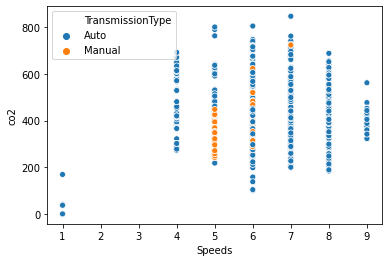

In [43]:
sns.scatterplot(data=df2,x="Speeds",y="co2", hue="TransmissionType")

<AxesSubplot:xlabel='Speeds', ylabel='co2'>

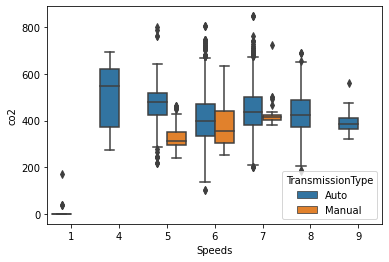

In [44]:
sns.boxplot(data=df2,x="Speeds",y="co2", hue="TransmissionType")

<AxesSubplot:xlabel='TransmissionType', ylabel='co2'>

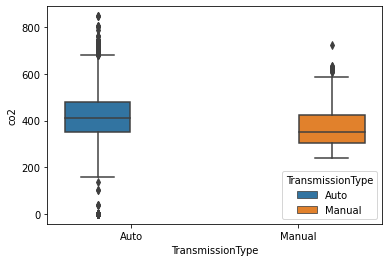

In [45]:
sns.boxplot(data=df2,x="TransmissionType",y="co2", hue="TransmissionType")

From the previous plots we can see that, with the data we currently have, there is not a assertive way to say that Automatic transmissions are more or less eco-friendly than it's manual counterpart. However, as seen bellow, `engine displacement` has a very strong.

A possibility to research further is to separate the cars by engine displacement and check between manual and auto on each category.

In [46]:
df = df[df["co2"]>=0]

<AxesSubplot:xlabel='displ', ylabel='co2'>

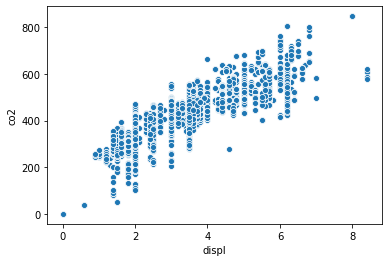

In [47]:
sns.scatterplot(data=df,x="displ",y="co2")

<AxesSubplot:xlabel='displ', ylabel='Speeds'>

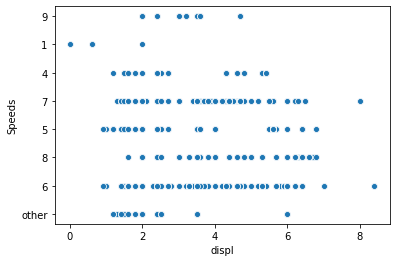

In [48]:
sns.scatterplot(data=df,x="displ",y="Speeds")

Scatterplots look a bit weird with categorical variables.

In [49]:
df = df[df["Speeds"]!="other"]
df["Speeds"] = df["Speeds"].astype(int)

<AxesSubplot:xlabel='displ', ylabel='Speeds'>

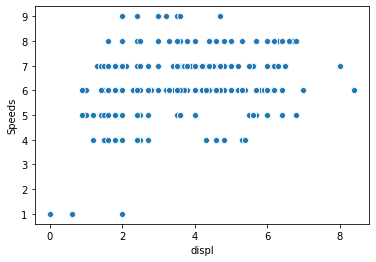

In [50]:
sns.scatterplot(data=df,x="displ",y="Speeds")

In [51]:
df['fuelType1'].value_counts(dropna=False)

Regular Gasoline     2663
Premium Gasoline     2625
Diesel                130
Electricity           106
Midgrade Gasoline      58
Natural Gas             4
Name: fuelType1, dtype: int64

<AxesSubplot:xlabel='fuelType1', ylabel='co2'>

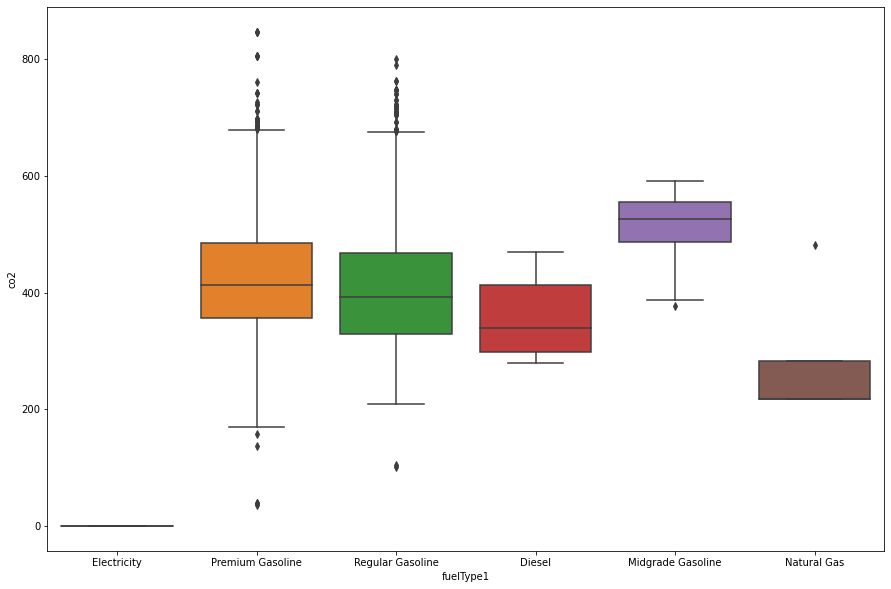

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x="fuelType1",y="co2")

<AxesSubplot:xlabel='hpv', ylabel='co2'>

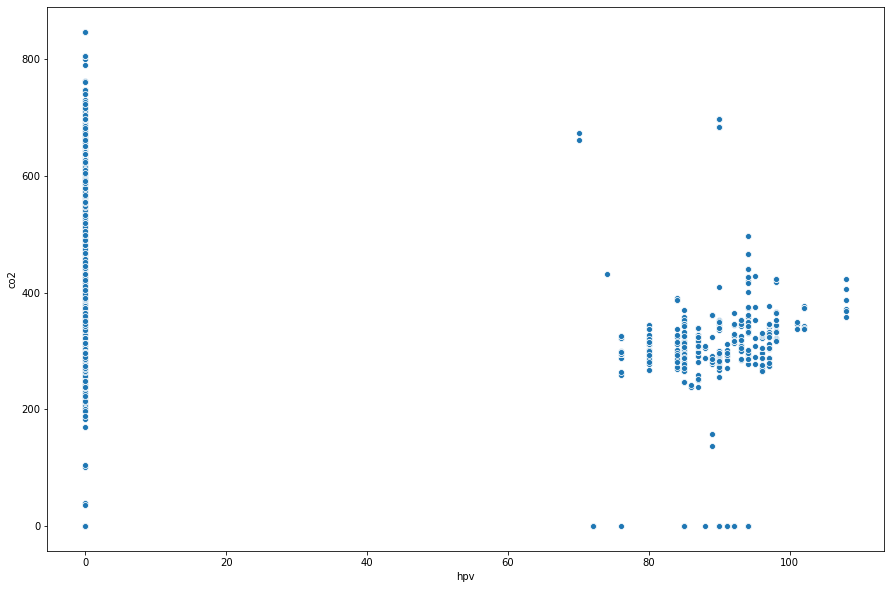

In [53]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df,x="hpv",y="co2")

In [54]:
# Iterate over data frame:

for i in df:
    print(i)

barrels08
barrelsA08
charge120
charge240
city08
city08U
cityA08
cityA08U
cityCD
cityE
cityUF
co2
co2A
co2TailpipeAGpm
co2TailpipeGpm
comb08
comb08U
combA08
combA08U
combE
combinedCD
combinedUF
cylinders
displ
drive
engId
eng_dscr
feScore
fuelCost08
fuelCostA08
fuelType1
ghgScore
ghgScoreA
highway08
highway08U
highwayA08
highwayA08U
highwayCD
highwayE
highwayUF
hlv
hpv
id
lv2
lv4
make
model
mpgData
phevBlended
pv2
pv4
range
rangeCity
rangeCityA
rangeHwy
rangeHwyA
trany
UCity
UCityA
UHighway
UHighwayA
VClass
year
youSaveSpend
guzzler
trans_dscr
tCharger
sCharger
atvType
fuelType2
rangeA
evMotor
mfrCode
c240Dscr
charge240b
c240bDscr
createdOn
modifiedOn
startStop
phevCity
phevHwy
phevComb
TransmissionType
Speeds


## Iterating over rows <a name=iter></a>

In [55]:
for ind,row in df.iterrows():
    print(ind)
    print(row)
    print(type(row))
    break

23026
barrels08           0.348
barrelsA08              0
charge120               0
charge240               0
city08                 62
                    ...  
phevCity                0
phevHwy                 0
phevComb                0
TransmissionType     Auto
Speeds                  1
Name: 23026, Length: 84, dtype: object
<class 'pandas.core.series.Series'>


In [56]:
df[["TransmissionType","Speeds"]]

,TransmissionType,Speeds
23026,Auto,1
23027,Auto,1
23028,Auto,1
23029,Auto,1
23030,Auto,1
...,...,...
30970,Auto,8
30972,Auto,1
30973,Auto,1
30974,Auto,1


In [57]:
trans = []
for ind,row in df.iterrows():
    trans.append(f"{row['TransmissionType']}({row['Speeds']})")

In [58]:
df["fullTrans"] = trans

### Apply and axis <a name=axis></a>

In [59]:
df["fullTrans"] = df.apply(lambda row: f"{row['TransmissionType']}({row['Speeds']})",axis=1)

In [60]:
df[["TransmissionType","Speeds","fullTrans"]]

,TransmissionType,Speeds,fullTrans
23026,Auto,1,Auto(1)
23027,Auto,1,Auto(1)
23028,Auto,1,Auto(1)
23029,Auto,1,Auto(1)
23030,Auto,1,Auto(1)
...,...,...,...
30970,Auto,8,Auto(8)
30972,Auto,1,Auto(1)
30973,Auto,1,Auto(1)
30974,Auto,1,Auto(1)


In [61]:
df = pd.DataFrame([[1,2,3],[0,0,0],[4,5,6]])

In [62]:
df

,0,1,2
0,1,2,3
1,0,0,0
2,4,5,6


In [63]:
df.apply(sum)

0    5
1    7
2    9
dtype: int64

In [64]:
df.apply(sum, axis=1)

0     6
1     0
2    15
dtype: int64

In [65]:
dfT = df.T

In [66]:
dfT

,0,1,2
0,1,0,4
1,2,0,5
2,3,0,6


In [67]:
dfT.apply(sum,axis=0)

0     6
1     0
2    15
dtype: int64

In [68]:
dfT.apply(sum, axis=1)

0    5
1    7
2    9
dtype: int64